In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from utils import *
import datetime
cds = pd.read_csv('/Users/ben/Desktop/crime_data.csv')
cds.columns = ['id', 'latitude', 'longitude', 'timestamp', 'estimate', 'model_id',
               'lat_bb', 'lon_bb', 'timestamp_unix', 'n_crimes']

In [65]:
cds['n_crimes'] = cds.n_crimes.fillna(0)
cds['crime_occ'] = cds.n_crimes.apply(lambda x: min(x, 1))

In [29]:
cds_train = cds[cds['timestamp'] < datetime.datetime(year=2019, month=1, day=1)]
cds_test = cds[cds['timestamp'] >= datetime.datetime(year=2019, month=1, day=1)]
cds_train.to_csv('/Users/ben/Desktop/crime_data_train.csv')
cds_test.to_csv('/Users/ben/Desktop/crime_data_test.csv')

In [35]:
cds = pd.read_csv('/Users/ben/Desktop/crime_data_train.csv')
def cla_timestamp_to_datetime(cla_ts):
    return datetime.datetime.strptime(cla_ts, '%Y-%m-%d %H:%M:%S.%f')

cds.timestamp = cds.timestamp.apply(cla_timestamp_to_datetime)

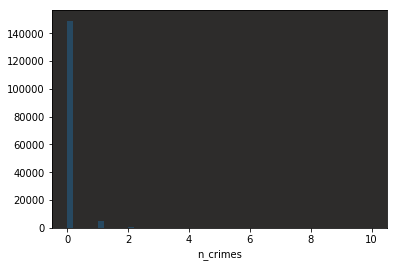

In [36]:
sns.distplot(cds.n_crimes, kde=False)

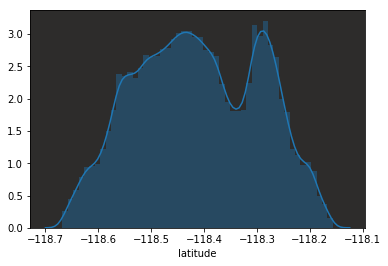

In [37]:
sns.distplot(cds.latitude)

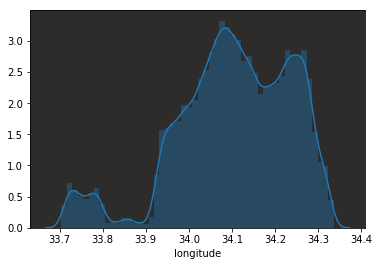

In [38]:
sns.distplot(cds.longitude)

In [49]:
cds['day_of_week'] = cds.timestamp.apply(lambda x: x.weekday())

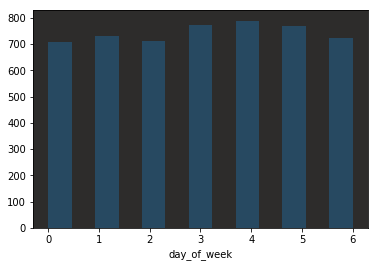

In [67]:
sns.distplot(cds[cds['crime_occ']==1].day_of_week, kde=False)

In [55]:
cds['time_minutes'] = cds.timestamp.apply(lambda x: datetime.datetime.time(x).hour * 60 + datetime.datetime.time(x).minute)
cds['hour'] = cds.timestamp.apply(lambda x: datetime.datetime.time(x).hour)


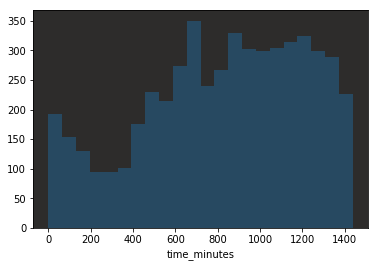

In [66]:
sns.distplot(cds[cds['crime_occ']==1].time_minutes, kde=False)

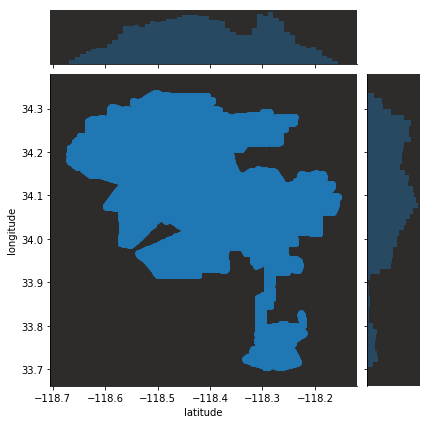

In [68]:
sns.jointplot(x='latitude', y='longitude', data=cds)

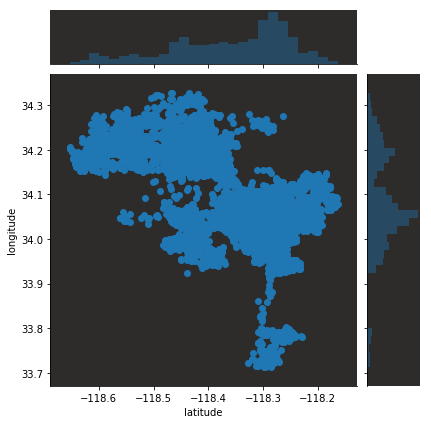

In [69]:
sns.jointplot(x='latitude', y='longitude', data=cds[cds['crime_occ']==1])